In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dflojas.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [3]:
dftreino = pd.read_csv("dataset_treino.csv")
dftreino.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [4]:
dfteste = pd.read_csv("dataset_teste.csv")
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
len(dftreino)

1017209

In [6]:
len(dflojas)

1115

In [7]:
dfMergedTreino = pd.merge(dftreino, dflojas, on='Store', how='inner')

In [8]:
dfMergedTreino['Promo2SinceWeek'] = dfMergedTreino['Promo2SinceWeek'].fillna(0)
dfMergedTreino['Promo2SinceYear'] = dfMergedTreino['Promo2SinceYear'].fillna(0)
dfMergedTreino['PromoInterval'] = dfMergedTreino['PromoInterval'].fillna(0)
dfMergedTreino['CompetitionOpenSinceYear'] = dfMergedTreino['CompetitionOpenSinceYear'].fillna(0)
dfMergedTreino['CompetitionOpenSinceMonth'] = dfMergedTreino['CompetitionOpenSinceMonth'].fillna(0)
dfMergedTreino['CompetitionDistance'] = dfMergedTreino['CompetitionDistance'].fillna(0)

In [9]:
dfMergedTreino[dfMergedTreino['Promo2'] == 1].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
943,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
944,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
945,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
946,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [10]:
dfMergedTreino.groupby('StoreType').count()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
StoreType,,,,,,,,,,,,,,,,,
a,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627
b,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830
c,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840
d,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912


In [11]:
dfMergedTreino.groupby('Assortment').count()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Assortment,,,,,,,,,,,,,,,,,
a,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445,537445
b,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294
c,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470,471470


In [12]:
dfMergedTreino.groupby('StateHoliday').count()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
StateHoliday,,,,,,,,,,,,,,,,,
0,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072
0,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087
a,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260
b,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690
c,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100


In [13]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dfMergedTreino['StateHoliday'] = dfMergedTreino['StateHoliday'].apply(lambda x: strToInt(x))
dfMergedTreino['StoreType'] = dfMergedTreino['StoreType'].apply(lambda x: strToInt(x))
dfMergedTreino['Assortment'] = dfMergedTreino['Assortment'].apply(lambda x: strToInt(x))

In [14]:
dfMergedTreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0


In [15]:
dfMergedTreino['Timestamp'] = pd.to_datetime(dfMergedTreino['Date'])
dfMergedTreino['Year'] = dfMergedTreino['Timestamp'].apply(lambda data: data.year)
dfMergedTreino['Month'] = dfMergedTreino['Timestamp'].apply(lambda data: data.month)
dfMergedTreino['Day'] = dfMergedTreino['Timestamp'].apply(lambda data: data.day)
dfMergedTreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Timestamp,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,9.0,2008.0,0,0.0,0.0,0,2015-07-31,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,3,...,9.0,2008.0,0,0.0,0.0,0,2015-07-30,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,3,...,9.0,2008.0,0,0.0,0.0,0,2015-07-29,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,3,...,9.0,2008.0,0,0.0,0.0,0,2015-07-28,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,3,...,9.0,2008.0,0,0.0,0.0,0,2015-07-27,2015,7,27


In [16]:
dfMergedTreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Timestamp', 'Year', 'Month',
       'Day'],
      dtype='object')

In [17]:
dfMergedTreino[dfMergedTreino.isna().values == True]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Timestamp,Year,Month,Day


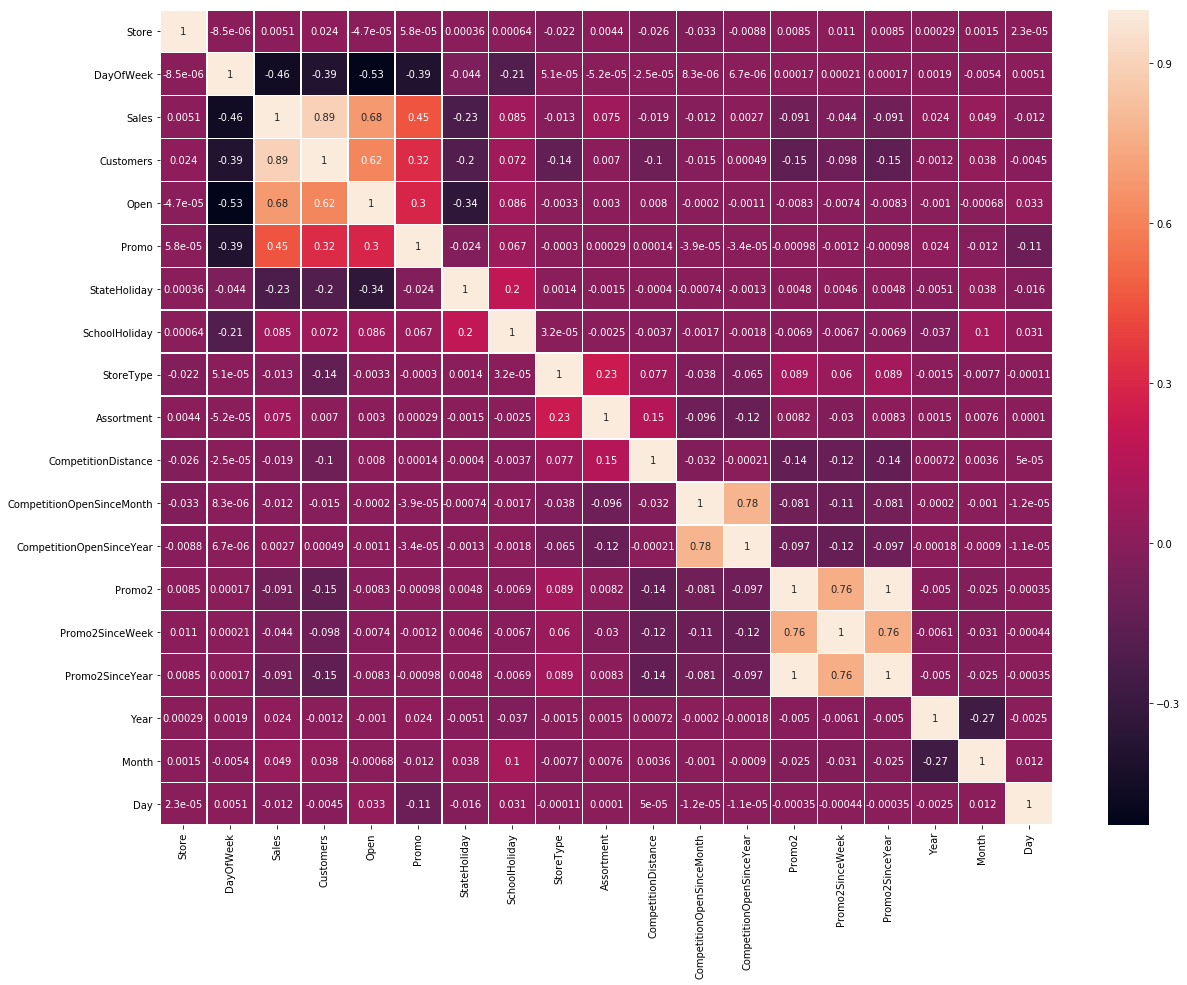

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(dfMergedTreino.corr(), annot = True, linewidths=.5, ax=ax)

In [19]:
X = dfMergedTreino[['Store', 'DayOfWeek', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month',
       'Day']]
y = dfMergedTreino['Customers']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
predicao = lm.predict(X_test)
len(predicao)

254303

In [24]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predicao))
print(metrics.mean_squared_error(y_test, predicao))
print(np.sqrt(metrics.mean_squared_error(y_test, predicao)))

217.70603216066755
116518.21236690585
341.3476415136127


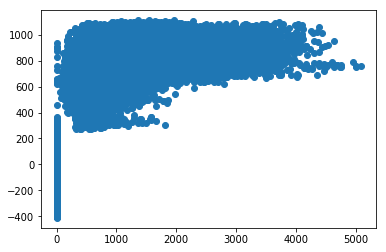

In [25]:
plt.scatter(y_test, predicao)

In [26]:
dfPredict = pd.DataFrame(predicao)
dfPredict.head()

,0
0,26.602915
1,697.747050
2,995.666781
3,-118.452907
4,581.093180


In [27]:
dfTesteMerged = pd.merge(dfteste, dflojas, on='Store', how='inner')
dfTesteMerged.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,4281,1,6,2015-09-12,1.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,5137,1,5,2015-09-11,1.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,5993,1,4,2015-09-10,1.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,6849,1,3,2015-09-09,1.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,7705,1,2,2015-09-08,1.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [28]:
dfTesteMerged['Promo2SinceWeek'] = dfTesteMerged['Promo2SinceWeek'].fillna(0)
dfTesteMerged['Promo2SinceYear'] = dfTesteMerged['Promo2SinceYear'].fillna(0)
dfTesteMerged['PromoInterval'] = dfTesteMerged['PromoInterval'].fillna(0)
dfTesteMerged['CompetitionOpenSinceYear'] = dfTesteMerged['CompetitionOpenSinceYear'].fillna(0)
dfTesteMerged['CompetitionOpenSinceMonth'] = dfTesteMerged['CompetitionOpenSinceMonth'].fillna(0)
dfTesteMerged['CompetitionDistance'] = dfTesteMerged['CompetitionDistance'].fillna(0)
dfTesteMerged['Open'] = dfTesteMerged['Open'].fillna(0)

In [29]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dfTesteMerged['StateHoliday'] = dfTesteMerged['StateHoliday'].apply(lambda x: strToInt(x))
dfTesteMerged['StoreType'] = dfTesteMerged['StoreType'].apply(lambda x: strToInt(x))
dfTesteMerged['Assortment'] = dfTesteMerged['Assortment'].apply(lambda x: strToInt(x))

In [30]:
dfTesteMerged['Timestamp'] = pd.to_datetime(dfTesteMerged['Date'])
dfTesteMerged['Year'] = dfTesteMerged['Timestamp'].apply(lambda data: data.year)
dfTesteMerged['Month'] = dfTesteMerged['Timestamp'].apply(lambda data: data.month)
dfTesteMerged['Day'] = dfTesteMerged['Timestamp'].apply(lambda data: data.day)
dfTesteMerged.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Timestamp,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,...,9.0,2008.0,0,0.0,0.0,0,2015-09-17,2015,9,17
1,857,1,3,2015-09-16,1.0,1,0,0,3,1,...,9.0,2008.0,0,0.0,0.0,0,2015-09-16,2015,9,16
2,1713,1,2,2015-09-15,1.0,1,0,0,3,1,...,9.0,2008.0,0,0.0,0.0,0,2015-09-15,2015,9,15
3,2569,1,1,2015-09-14,1.0,1,0,0,3,1,...,9.0,2008.0,0,0.0,0.0,0,2015-09-14,2015,9,14
4,3425,1,7,2015-09-13,0.0,0,0,0,3,1,...,9.0,2008.0,0,0.0,0.0,0,2015-09-13,2015,9,13


In [31]:
dfTesteMerged[dfTesteMerged.isna().values == True]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Timestamp,Year,Month,Day


In [32]:
XTesteMerged = dfTesteMerged[['Store', 'DayOfWeek', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month',
       'Day']]

In [33]:
CustomersToDfTeste = lm.predict(XTesteMerged)
len(CustomersToDfTeste)

41088

In [34]:
CustomersToDfTeste

array([864.18161542, 874.69008491, 885.19855439, ..., 786.39508867,
       -79.48003386, 607.65717544])

In [35]:
dfTesteMerged['Customers'] = CustomersToDfTeste
dfTesteMerged.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Timestamp,Year,Month,Day,Customers
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,...,2008.0,0,0.0,0.0,0,2015-09-17,2015,9,17,864.181615
1,857,1,3,2015-09-16,1.0,1,0,0,3,1,...,2008.0,0,0.0,0.0,0,2015-09-16,2015,9,16,874.690085
2,1713,1,2,2015-09-15,1.0,1,0,0,3,1,...,2008.0,0,0.0,0.0,0,2015-09-15,2015,9,15,885.198554
3,2569,1,1,2015-09-14,1.0,1,0,0,3,1,...,2008.0,0,0.0,0.0,0,2015-09-14,2015,9,14,895.707024
4,3425,1,7,2015-09-13,0.0,0,0,0,3,1,...,2008.0,0,0.0,0.0,0,2015-09-13,2015,9,13,29.831901


In [36]:
dfMergedTreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Timestamp', 'Year', 'Month',
       'Day'],
      dtype='object')

In [37]:
X = dfMergedTreino[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day']]
y = dfMergedTreino['Sales']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
predicao = lm2.predict(X_test)
len(predicao)

254303

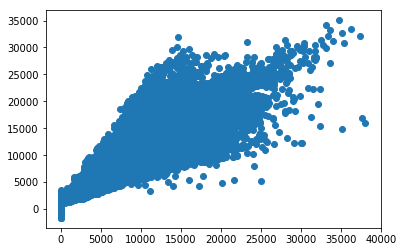

In [41]:
plt.scatter(y_test, predicao)

In [42]:
dfTesteMerged.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Timestamp',
       'Year', 'Month', 'Day', 'Customers'],
      dtype='object')

In [43]:
XTest = dfTesteMerged[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day']]

In [44]:
predicaoTeste = lm2.predict(XTest)
len(predicaoTeste)

41088

In [45]:
predicaoTeste

array([8442.15494506, 8575.0003181 , 8707.84569114, ..., 8727.9381774 ,
        233.93711675, 6008.87291708])

In [46]:
dfPredito = pd.DataFrame(predicaoTeste)

In [47]:
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.count()

0    41088
dtype: int64

In [48]:
dfPredito.to_csv('submission2modelos.csv')

In [49]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predicao)

943.9550486436377

In [50]:
metrics.mean_squared_error(y_test, predicao)

1952265.2420121068

In [51]:
np.sqrt(metrics.mean_squared_error(y_test, predicao))

1397.234855710416